<IPython.core.display.Javascript object>


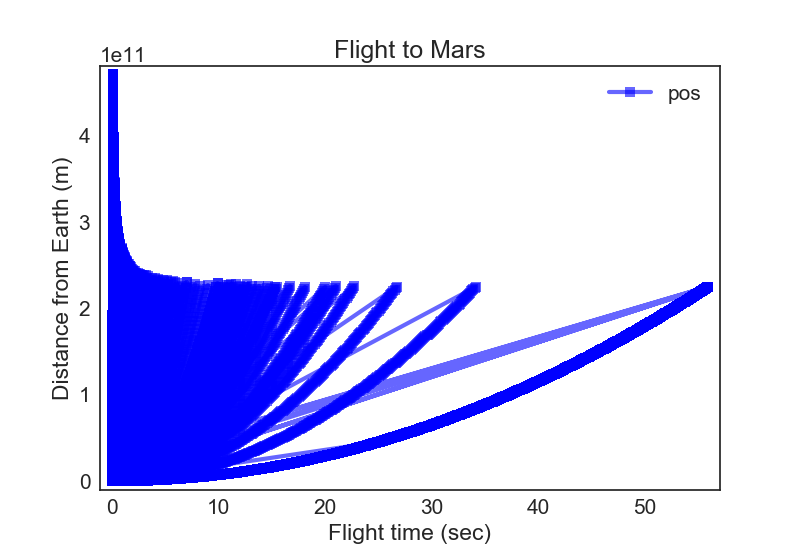

1.6000444456790466 second


In [26]:
%matplotlib notebook

from modsim import *








#Units
Kg= UNITS.kilogram
N= UNITS.kilogram * UNITS.meter / UNITS.second**2
Km= 1000 * UNITS.meter
degree = UNITS.degree
s = UNITS.second
m = UNITS.meter

#Variables

No_Change= System(
G = 6.674 * 10**-11 * N * m**2 / Kg**2,
Mass_Earth= 5.972 * 10**24 * Kg,
Mass_Mars= 6.39 * 10**23 * Kg,
Mass_Victim= 70 * Kg,
Distance_Earth_Victim= 6371 * Km,


Force_Punch=  1 *10**13 * N,

Punch_Time = .125 * s,
Distance_Victim_Mars= 225 * 10**6 * Km,
    )

Equations= System(


Punch_Velocity = No_Change.Force_Punch * No_Change.Punch_Time / No_Change.Mass_Victim,
accel_ge = -((No_Change.G) * No_Change.Mass_Earth) / (No_Change.Distance_Earth_Victim **2),
accel_gm = -((No_Change.G) * No_Change.Mass_Mars) / (No_Change.Distance_Victim_Mars **2)
                 )


condition = Condition(y= 0*m,
                      earth_g= Equations.accel_ge,
                      mars_g = Equations.accel_gm,
                      Mass_Earth= No_Change.Mass_Earth,
                      Mass_Mars= No_Change.Mass_Mars,
                      Mass_Victim= 70 * Kg,
                      Distance_Earth_Victim= 6371 * Km,
                      Distance_Victim_Mars= 225 * 10**6 * Km,
                      init_a = No_Change.Force_Punch/No_Change.Mass_Victim,
                      init_v = Equations.Punch_Velocity,
                      duration = 3600 *s,
                      G = No_Change.G
                      )


flight=System(y_pos=0, y_vel=condition.init_v, y_accel= condition.init_a, ts = linspace(0,condition.duration, 36000),
             y_postokeep=[], y_veltokeep=[], y_acceltokeep=[], timekeep = 0)


def run_steps(system, ts):
    for t in ts:
        system.timekeep = t
        step(system)
        plot_system(system)
        if system.y_pos >= condition.Distance_Victim_Mars:
            break
        
def step(system):
    Dist_E_V = condition.Distance_Earth_Victim + system.y_pos
    
    Dist_M_V = condition.Distance_Victim_Mars - system.y_pos
    
    accel_ge = -(condition.G * condition.Mass_Earth) / (Dist_E_V **2)
    
    a = accel_ge
    
    system.y_accel = system.y_accel + a
    system.y_vel = system.y_vel + (system.y_accel*system.ts[1])
    system.y_pos = system.y_pos + (system.y_vel*system.ts[1])
    
    system.y_postokeep.append(system.y_pos)
    system.y_veltokeep.append(system.y_vel)
    system.y_acceltokeep.append(system.y_accel)
    
def plot_system(system):
    plot(system.timekeep,system.y_pos, 'bs-', label='pos')
    decorate_pos()
    
def decorate_pos():
    decorate(title='Flight to Mars',
            xlabel='Flight time (sec)',
            ylabel='Distance from Earth (m)')
    
run_steps(flight,flight.ts)
print(flight.timekeep)

In [43]:
#Parameter Sweep!!!!!!!!!!!!!!!

#def sweep_parameters(beta_array, gamma_array):
#frame = SweepFrame(columns=gamma_array)
#for gamma in gamma_array:
#frame[gamma] = sweep_beta(beta_array, gamma)
#return frame

#force_array= linspace(1 *10**10 * N, 6 *10**14 * N, 36000)

force_array= linspace(1 *10**10 * N, 6 *10**14 * N, 10000)

def sweep_force(force_array):
    sweep_time = []
    for force in force_array:
        No_Change= System(
        G = 6.674 * 10**-11 * N * m**2 / Kg**2,
        Mass_Earth= 5.972 * 10**24 * Kg,
        Mass_Mars= 6.39 * 10**23 * Kg,
        Mass_Victim= 70 * Kg,
        Distance_Earth_Victim= 6371 * Km,


        Force_Punch= force,


        Distance_Victim_Mars= 225 * 10**6 * Km,
        Punch_Time = .125 * s,
        )
        Equations= System(
       
        Punch_Velocity = No_Change.Force_Punch * No_Change.Punch_Time / No_Change.Mass_Victim,
        accel_ge = -((No_Change.G) * No_Change.Mass_Earth) / (No_Change.Distance_Earth_Victim **2),
        accel_gm = -((No_Change.G) * No_Change.Mass_Mars) / (No_Change.Distance_Victim_Mars **2)
                 )
        
        condition = Condition(y= 0*m,
                      earth_g= Equations.accel_ge,
                      mars_g = Equations.accel_gm,
                      Mass_Earth= No_Change.Mass_Earth,
                      Mass_Mars= No_Change.Mass_Mars,
                      Mass_Victim= 70 * Kg,
                      Distance_Earth_Victim= 6371 * Km,
                      Distance_Victim_Mars= 225 * 10**6 * Km,
                      init_a = No_Change.Force_Punch/No_Change.Mass_Victim,
                      init_v = Equations.Punch_Velocity,
                      duration = 3600 *s,
                      G = No_Change.G
                      )
        
        flight=System(y_pos=0, y_vel=condition.init_v, y_accel= condition.init_a, ts = linspace(0,condition.duration, 36000),
             y_postokeep=[], y_veltokeep=[], y_acceltokeep=[], timekeep = 0)
        
        run_steps(flight,flight.ts)
        sweep_time.append(flight.timekeep)
    return sweep_time


In [44]:
times2 = sweep_force(force_array)


In [42]:
print(times)

[<Quantity(55.90155282091169, 'second')>, <Quantity(7.000194449845829, 'second')>, <Quantity(4.900136114892081, 'second')>, <Quantity(3.900108336342676, 'second')>, <Quantity(3.400094447067974, 'second')>, <Quantity(3.0000833356482124, 'second')>, <Quantity(2.7000750020833912, 'second')>, <Quantity(2.5000694463735105, 'second')>, <Quantity(2.3000638906636293, 'second')>, <Quantity(2.200061112808689, 'second')>, <Quantity(2.1000583349537485, 'second')>, <Quantity(2.000055557098808, 'second')>, <Quantity(1.9000527792438677, 'second')>, <Quantity(1.8000500013889273, 'second')>, <Quantity(1.700047223533987, 'second')>, <Quantity(1.700047223533987, 'second')>, <Quantity(1.6000444456790466, 'second')>, <Quantity(1.5000416678241062, 'second')>, <Quantity(1.5000416678241062, 'second')>, <Quantity(1.4000388899691658, 'second')>, <Quantity(1.4000388899691658, 'second')>, <Quantity(1.4000388899691658, 'second')>, <Quantity(1.3000361121142254, 'second')>, <Quantity(1.3000361121142254, 'second')>, 